In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Customer_Churn.csv')
df.shape

(7043, 21)

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype("float")

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
def conv(value):
    if value ==1:
        return("Yes")
    else:
        return("No")
    
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


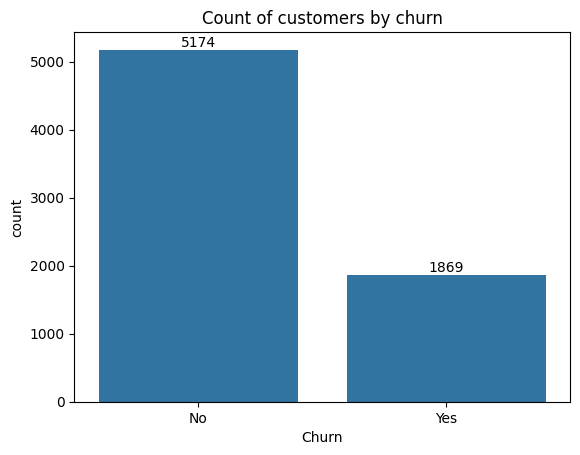

In [9]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show()

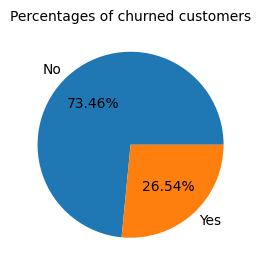

In [10]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentages of churned customers", fontsize=10)
plt.show()

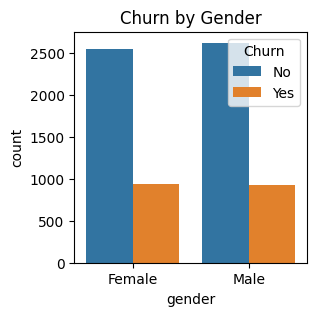

In [11]:
plt.figure(figsize=(3, 3))
sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Churn by Gender")
plt.show()

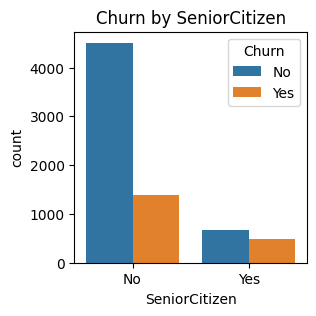

In [12]:
plt.figure(figsize=(3, 3))
sns.countplot(x="SeniorCitizen", data=df, hue="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

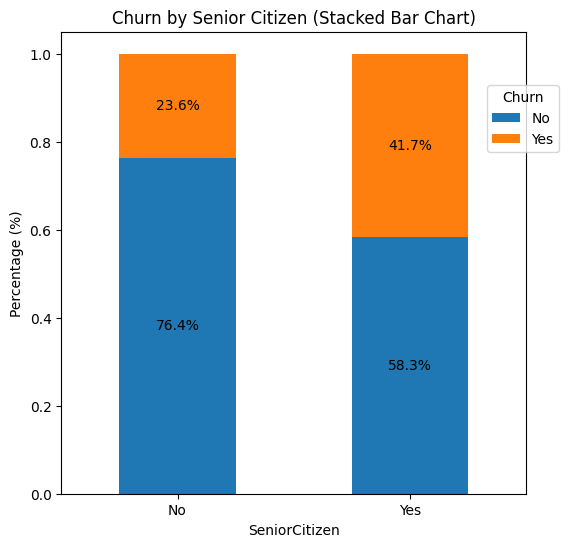

In [13]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

# Plot
fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Custom colors

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1%}', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(0.9,0.9))  # Customize legend location

plt.show()

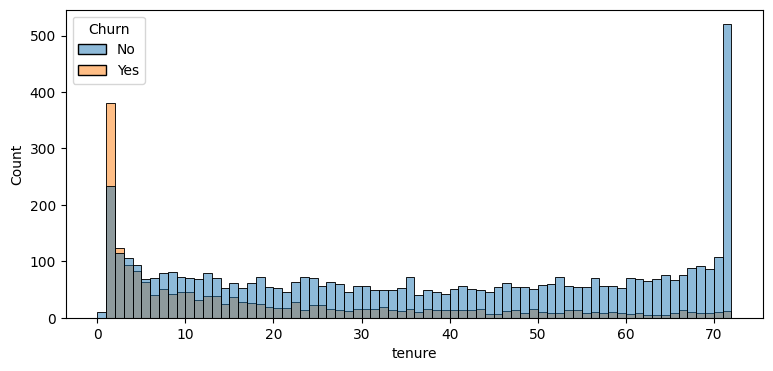

In [14]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data =df,bins=72,hue="Churn")
plt.show()

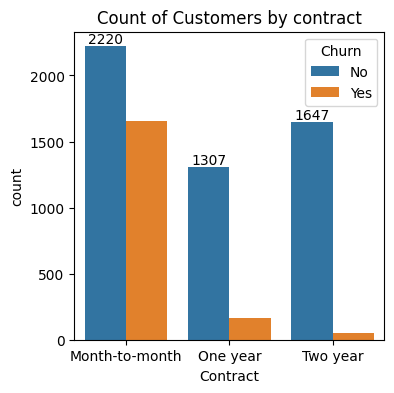

In [15]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract", data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by contract")
plt.show()

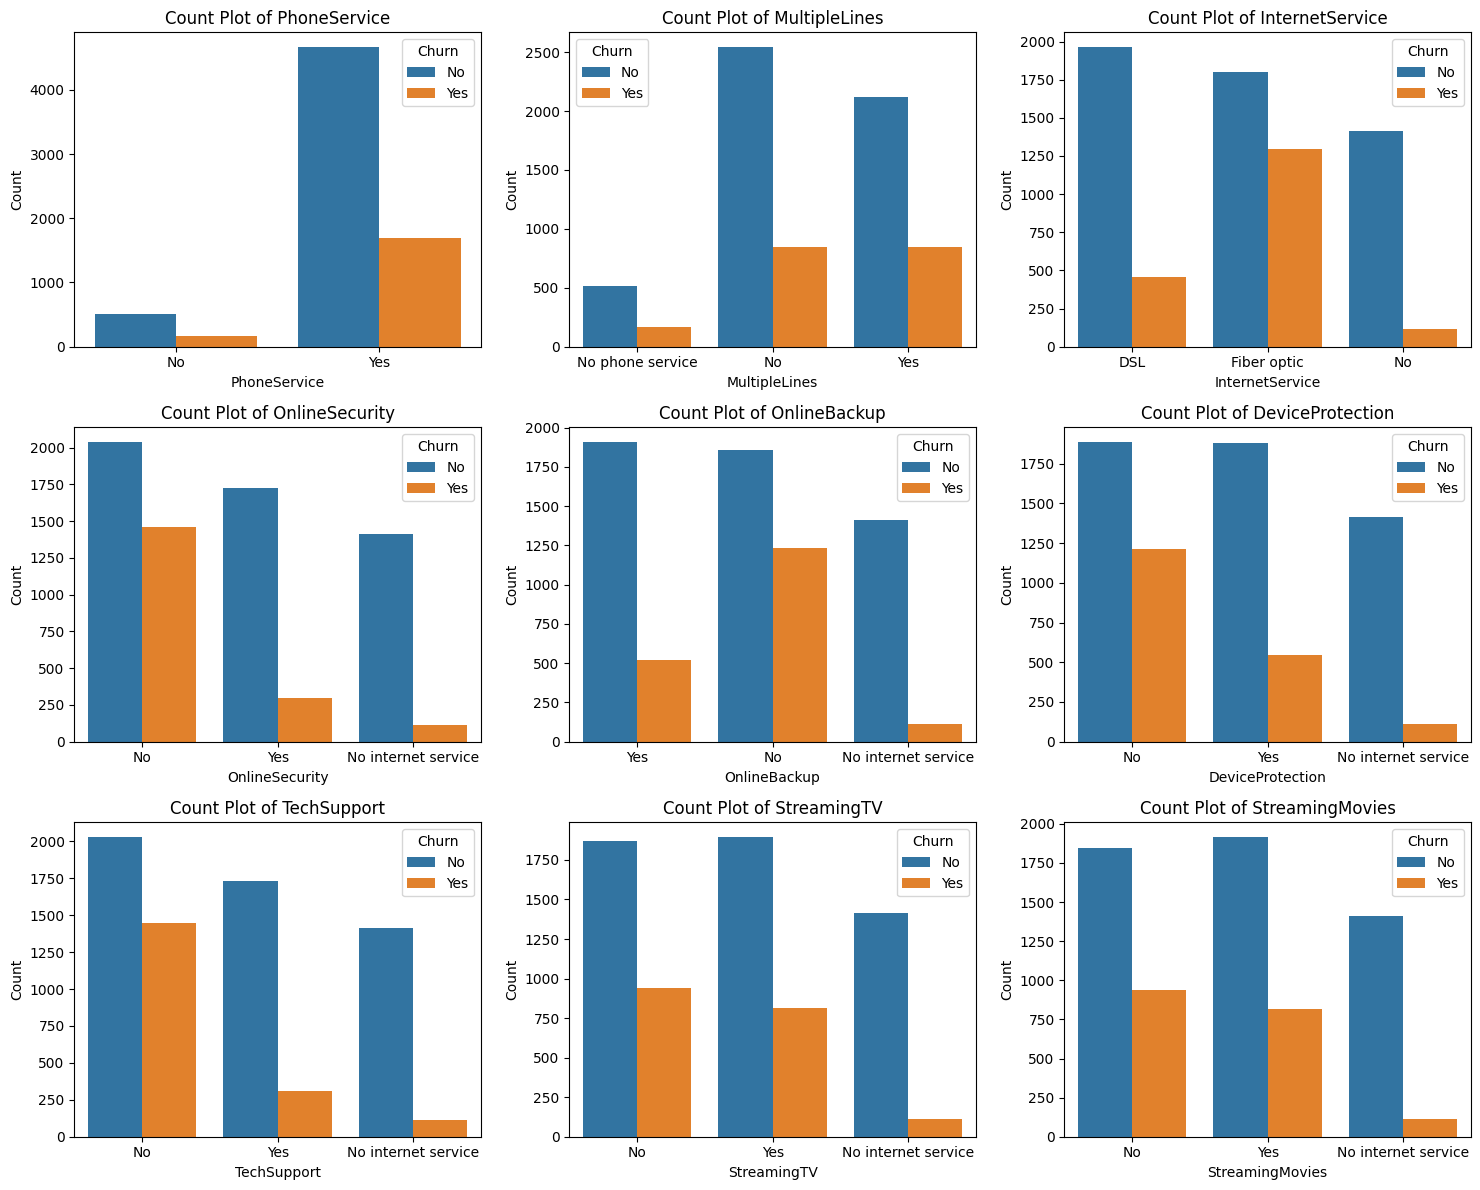

In [16]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i],hue=df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


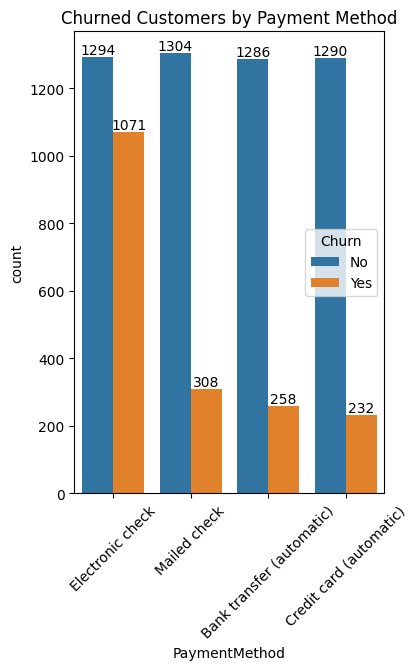

In [17]:
plt.figure(figsize=(4, 6))
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation=45)
plt.show()